In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i in range(N):
        for j in range(i+1, N):
            q = random.uniform(0, 1)
#            print(f'i = {i}; j = {j}; q = {q}')
            if q < p:
                G.add_edge(i, j)
    return G

In [3]:
N = 15
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
random_1 = random_graph(N, p_1)
random_2 = random_graph(N, p_2)
random_3 = random_graph(N, p_3)

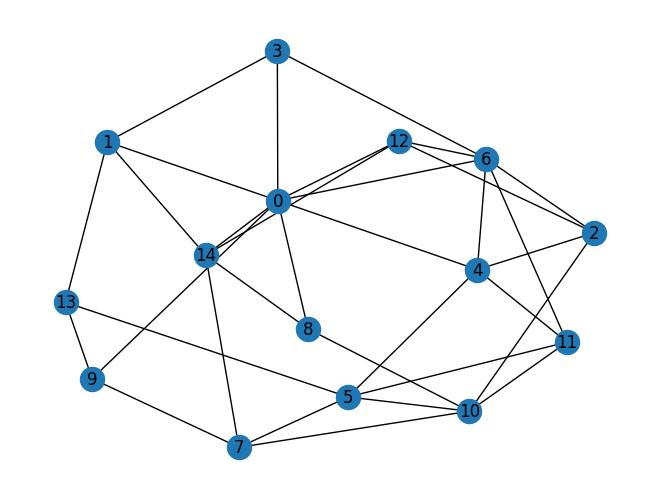

In [4]:
nx.draw(random_1, with_labels = True)

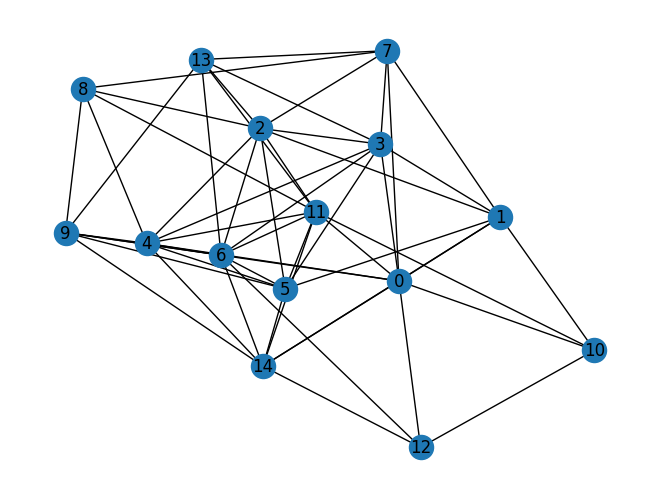

In [5]:
nx.draw(random_2, with_labels = True)

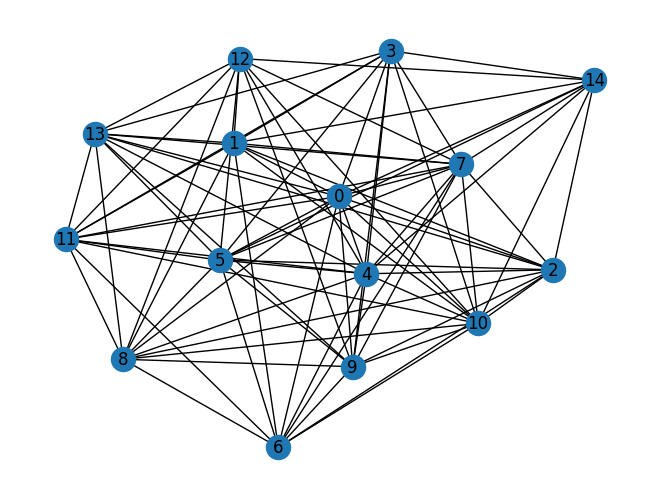

In [6]:
nx.draw(random_3, with_labels = True)

In [7]:
N = 2000
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
random_1 = random_graph(N, p_1)
random_2 = random_graph(N, p_2)
random_3 = random_graph(N, p_3)

In [8]:
print(f"Random graph with p = {p_1} has {nx.number_of_nodes(random_1)} nodes and {nx.number_of_edges(random_1)} edges")
print(f"Random graph with p = {p_2} has {nx.number_of_nodes(random_2)} nodes and {nx.number_of_edges(random_2)} edges")
print(f"Random graph with p = {p_3} has {nx.number_of_nodes(random_3)} nodes and {nx.number_of_edges(random_3)} edges")

Random graph with p = 0.3 has 2000 nodes and 599172 edges
Random graph with p = 0.5 has 2000 nodes and 1000650 edges
Random graph with p = 0.8 has 2000 nodes and 1599305 edges


In [9]:
def expect_av_degree_rand(N, p):
    return p * (N - 1)

In [10]:
def av_degree_rand(G):
    return 2 * nx.number_of_edges(G) / nx.number_of_nodes(G)

In [11]:
k_av_exp_1 = expect_av_degree_rand(N, p_1)
k_av_real_1 = av_degree_rand(random_1)

k_av_exp_2 = expect_av_degree_rand(N, p_2)
k_av_real_2 = av_degree_rand(random_2)

k_av_exp_3 = expect_av_degree_rand(N, p_3)
k_av_real_3 = av_degree_rand(random_3)

In [12]:
print(f"Random graph with p = {p_1} has average degree expexted: {k_av_exp_1} and real: {k_av_real_1}")
print(f"Random graph with p = {p_2} has average degree expexted: {k_av_exp_2} and real: {k_av_real_2}")
print(f"Random graph with p = {p_3} has average degree expexted: {k_av_exp_3} and real: {k_av_real_3}")

Random graph with p = 0.3 has average degree expexted: 599.6999999999999 and real: 599.172
Random graph with p = 0.5 has average degree expexted: 999.5 and real: 1000.65
Random graph with p = 0.8 has average degree expexted: 1599.2 and real: 1599.305


In [13]:
def var(N, p):
    return p * (1 - p) * (N - 1)

In [14]:
var_1 = var(N, p_1)
var_2 = var(N, p_2)
var_3 = var(N, p_3)

In [15]:
print(f"Random graph with p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Random graph with p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Random graph with p = {p_3} has variance of the degree distribution: {var_3}")

Random graph with p = 0.3 has variance of the degree distribution: 419.78999999999996
Random graph with p = 0.5 has variance of the degree distribution: 499.75
Random graph with p = 0.8 has variance of the degree distribution: 319.84


In [ ]:
nx.degree_histogram(random_1)

In [17]:
max(nx.degree_histogram(random_1))

46

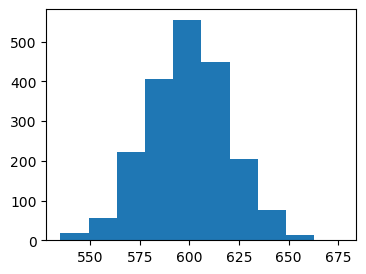

In [18]:
degrees_1 = sorted((d for n, d in random_1.degree()), reverse=True)
plt.figure(figsize = (4, 3))
plt.hist(degrees_1)
plt.show()

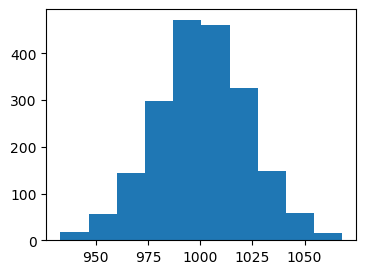

In [19]:
degrees_2 = sorted((d for n, d in random_2.degree()), reverse=True)
plt.figure(figsize = (4, 3))
plt.hist(degrees_2)
plt.show()

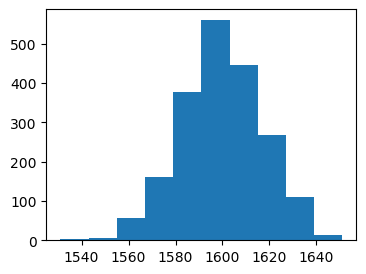

In [20]:
degrees_3 = sorted((d for n, d in random_3.degree()), reverse=True)
plt.figure(figsize = (4, 3))
plt.hist(degrees_3)
plt.show()

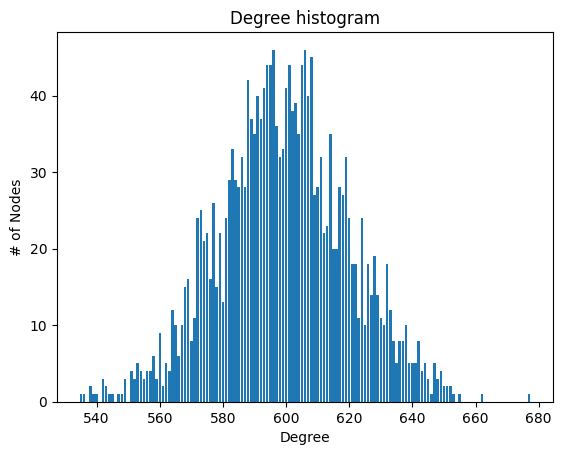

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = random_1

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

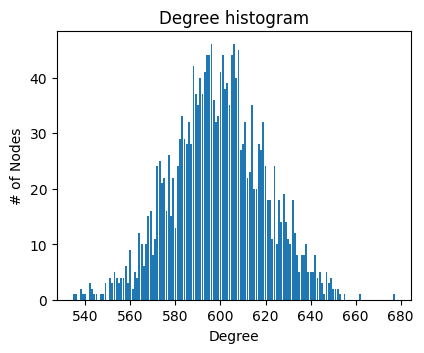

In [22]:
#Connected components of G, Degree Rank Plot, Degree histogram

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)
G = random_1

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()



In [ ]:
sorted(d for n, d in G.degree())

In [37]:
n = 3
k = 4
p = 1
ws = nx.watts_strogatz_graph(n, k, p, seed=None)
nx.draw(ws, with_labels = True)
print(nx.number_of_edges(ws))

<class 'networkx.exception.NetworkXError'>: k>n, choose smaller k or larger n

In [42]:
def watts_strogatz_graph(N, K, p):
    if K >= N:
        print("K must be smaller than N")
        return None
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    k = K // 2
    
    for i in range(N):
        for j in range(1, k+1):
            G.add_edge(i, (i+j) % N)
            
    for e in G.edges:
        # print(f"e = {e}")
        q = random.uniform(0, 1)
        # print(f"q = {q}")
#            print(f'i = {i}; j = {j}; q = {q}')
        if q < p:
            # print(f"q < p")
            v = random.randint(0, N-1)
            # print(f"v = {v}")
            while v == e[0] or [e[0], v] in G.edges:
                # print(f"v = {v}")
                v = random.randint(0, N-1)
            # print(f"e[0], v = {e[0]}, {v}")
            # print(f"e[0], e[1] = {e[0]}, {e[1]}")
            G.add_edge(e[0], v)
            G.remove_edge(e[0], e[1])
    return G

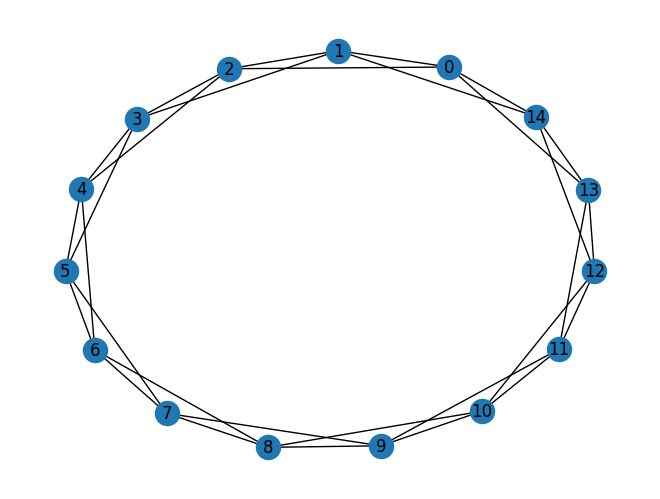

In [48]:
n = 15
k = 5
p = 0.0
ws = watts_strogatz_graph(n, k, p)
nx.draw(ws, with_labels = True)

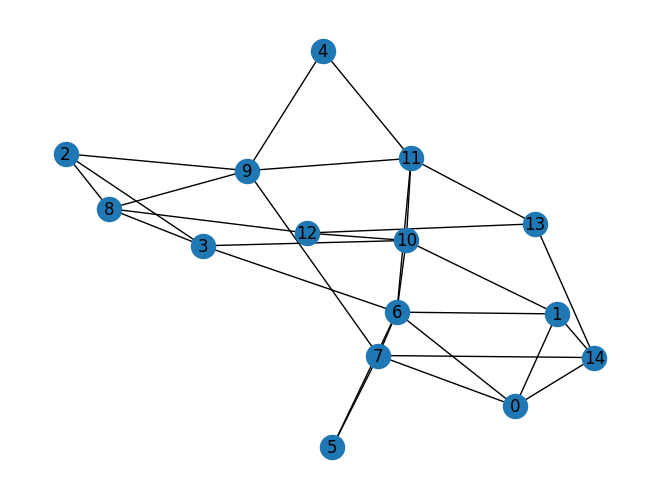

In [49]:
n = 15
k = 4
p = 0.5
ws = watts_strogatz_graph(n, k, p)
nx.draw(ws, with_labels = True)

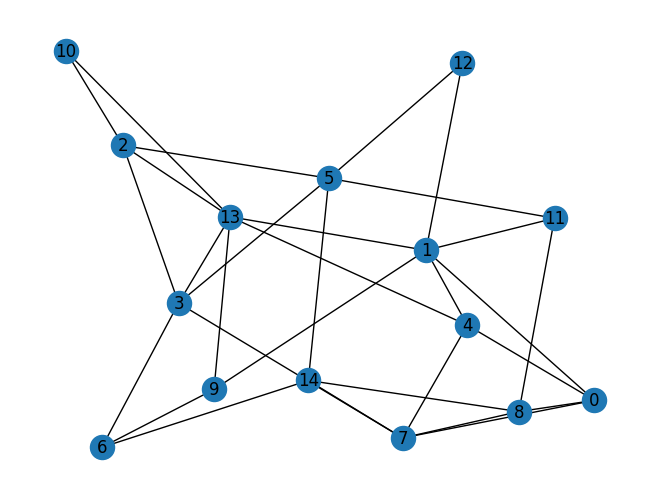

In [50]:
n = 15
k = 4
p = 1
ws = watts_strogatz_graph(n, k, p)
nx.draw(ws, with_labels = True)

In [ ]:
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i in range(N):
        for j in range(i+1, N):
            q = random.uniform(0, 1)
#            print(f'i = {i}; j = {j}; q = {q}')
            if q < p:
                G.add_edge(i, j)
    return G

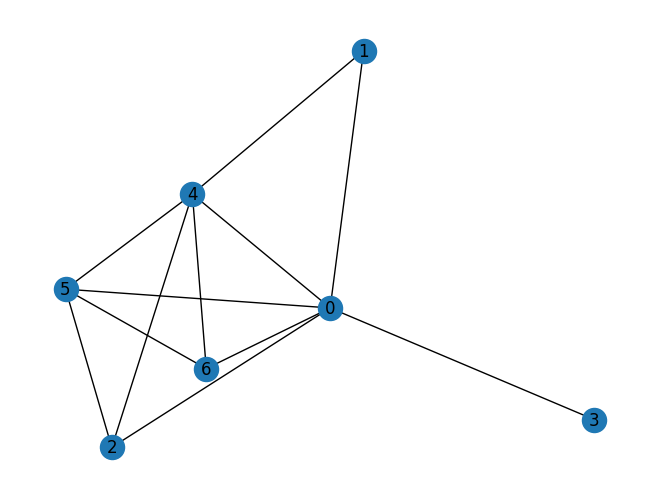

In [74]:
n = 7
m = 3
ba = nx.barabasi_albert_graph(n, m, seed=None, initial_graph=None)
nx.draw(ba, with_labels = True)

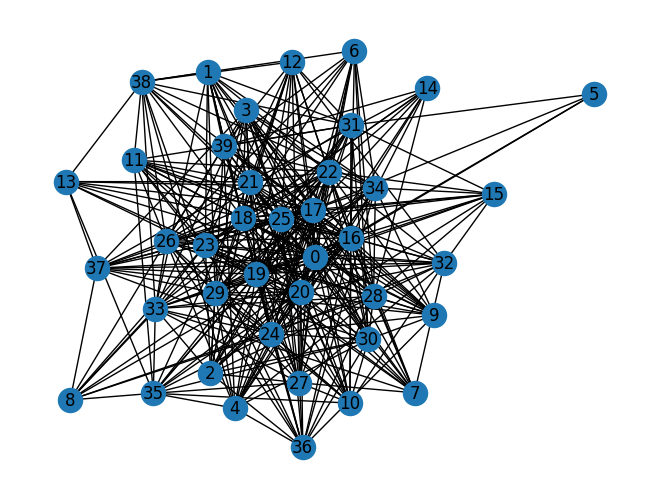

In [72]:
G= nx.barabasi_albert_graph(40,15)
nx.draw(G, with_labels=True)